# 01 Image object detection

## What is object detection?

It is the process of finding multiple objects in an image in terms of humna perspective such as bike, TV, people, etc. It is the combination of image recogntion, localization and detection of mupltiple objects. There are different approaches to achieve object detections like the followings.

1. Feature-Based Object Detection
2. Vila Jones Object Detection
3. SVM Classification
3. Deep learning Object Detection

In this tutorial, we will focus on deep learning object detection using tensorflow.

## What is tensorflow?

Tensorflow is Google’s Open Source Machine Learning Framework for dataflow programming across a range of tasks. Nodes in the graph represent mathematical operations, while the graph edges represent the multi-dimensional data arrays (tensors) communicated between them.

Tensors are just multidimensional arrays, an extension of 2-dimensional tables to data with a higher dimension. There are many features of Tensorflow which makes it appropriate for Deep Learning. So, without wasting any time, let’s see how we can implement Object Detection using Tensorflow.

## Install necessary package

In [ ]:
!pip install --user Cython
!pip install --user contextlib2
!pip install --user pillow
!pip install --user lxml
!pip install --user matplotlib
!pip install --user tf_slim

## Download Tensorflow Object Detection API

Please download this given package to Desktop and rename it as "models". https://github.com/tensorflow/models 

## Compile protobuf

Copy the following command and execute it in anaconda prompt. Remember the path should be "./models/research".

protoc object_detection/protos/*.proto --python_out=.

## Install tf_slim
1.Please use file explorer and go to "./models/research/slim", delete BUILD


2.Please use anaconda prompt and go the "./models/research". Copy the following command and run.

python setup.py build
python setup.py install

## Check your software requirements before we start
1. Python
2. Tensorflow (GPU/CPU)

The following code helps to check your tensorflow's version. If it shows the version number, it means your tensorflow is ready. Meanwhile, there may be several "FutureWarning". They can be ignored. 

In [ ]:
import tensorflow as tf
print(tf.__version__)

## Import necessary libraries



In [11]:
%matplotlib inline
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import time
 
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
 
sys.path.append("..")
from object_detection.utils import ops as utils_ops
 
from utils import label_map_util
 
from utils import visualization_utils as vis_util

## Download COCO dataset

COCO stands for Common Ojbect in Context. It is a dataset contains around 330k label images. Different models can be chosen in Tensorflow model zoo however there must be a tradeoff between speed and accuracy.


In [2]:
MODEL_NAME = 'ssd_mobilenet_v1_coco_2017_11_17'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = '<a href="http://download.tensorflow.org/models/object_detection/">http://download.tensorflow.org/models/object_detection/</a>'
 
PATH_TO_CKPT = MODEL_NAME + '/frozen_inference_graph.pb'
 
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')
 
NUM_CLASSES = 90

## Download the chosen network and extract

We will download "ssd_mobilenet_v1_coco" in https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf1_detection_zoo.md. Please extract it and put it under "./models/research/object_detection/"

In [3]:
MODEL_NAME = 'ssd_mobilenet_v1_coco_2018_01_28'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = '<a href="http://download.tensorflow.org/models/object_detection/">http://download.tensorflow.org/models/object_detection/</a>'
 
PATH_TO_CKPT = MODEL_NAME + '/frozen_inference_graph.pb'
 
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')
 
NUM_CLASSES = 90



In [4]:
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

## Load all the labels

In [5]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

## They are now needed to be converted to numpy array for processing

In [6]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

## Prepare a testing image

A testing image is prepared under "./models/research/object_detection".

In [7]:
image_path = "test_image.jpg"

## Start inferencing for a single image

Mon Dec 14 10:23:43 2020
Mon Dec 14 10:23:46 2020 elapsed time: 2.425s
done


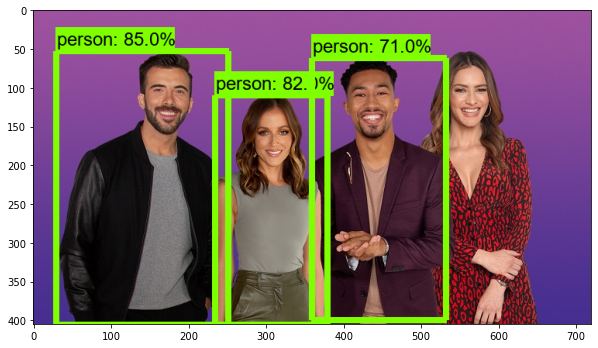

In [12]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

with detection_graph.as_default():
    with tf.Session(graph=detection_graph, config=config) as sess:
        start_time = time.time()
        print(time.ctime())
        image = Image.open(image_path)
        image_np = np.array(image).astype(np.uint8)
        image_np_expanded = np.expand_dims(image_np, axis=0)
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        scores = detection_graph.get_tensor_by_name('detection_scores:0')
        classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        (boxes, scores, classes, num_detections) = sess.run(
            [boxes, scores, classes, num_detections],
            feed_dict={image_tensor: image_np_expanded})
        print('{} elapsed time: {:.3f}s'.format(time.ctime(), time.time() - start_time))
        vis_util.visualize_boxes_and_labels_on_image_array(
            image_np, np.squeeze(boxes), np.squeeze(classes).astype(np.int32), np.squeeze(scores),
            category_index, use_normalized_coordinates=True, line_thickness=8)
        plt.figure(figsize=(10, 10))
        plt.imshow(image_np)
        print("done")